# Setup

In [13]:
# get working directory
import os
os.getcwd()
# change working directory

'/Users/home/VSCode/mids/266_fp/data'

In [14]:
# !mkdir ./data
# os.chdir('./data')
# os.getcwd()

In [6]:
os.chdir('/Users/home/VSCode/mids/266_fp/data')
os.getcwd()

'/Users/home/VSCode/mids/266_fp/data'

In [11]:
# !mkdir ./semeval2020-task11

In [13]:
os.chdir('/Users/home/VSCode/mids/266_fp/data/semeval2020-task11')
os.getcwd()

'/Users/home/VSCode/mids/266_fp/data/semeval2020-task11'

In [14]:
!ls -li

total 0


# SQuAD 2.0

skip

In [17]:
# from datasets import load_dataset

# ds = load_dataset("rajpurkar/squad_v2")

In [18]:
# import pandas as pd

# splits = {'train': 'squad_v2/train-00000-of-00001.parquet', 'validation': 'squad_v2/validation-00000-of-00001.parquet'}
# df = pd.read_parquet("hf://datasets/rajpurkar/squad_v2/" + splits["train"])

start

In [19]:
import pandas as pd
dfsq = pd.read_csv('squad/squad_train.csv')
dfsq.head(1)

,Unnamed: 0,id,title,context,question,answers
0,0,56be85543aeaaa14008c9063,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce start becoming popular?,"{'text': array(['in the late 1990s'], dtype=ob..."


In [20]:
# Display the columns and data types of the DataFrame
print("DataFrame Structure:")
print("-" * 50)
print(dfsq.dtypes)
print("\nBasic Information:")
print("-" * 50)
dfsq.info(verbose=False)  # Less verbose output
print("\nSample Data:")
print("-" * 50)
dfsq.head(3)  # Show first 3 rows
print("")
print("shape", dfsq.shape)

DataFrame Structure:
--------------------------------------------------
Unnamed: 0     int64
id            object
title         object
context       object
question      object
answers       object
dtype: object

Basic Information:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130319 entries, 0 to 130318
Columns: 6 entries, Unnamed: 0 to answers
dtypes: int64(1), object(5)
memory usage: 6.0+ MB

Sample Data:
--------------------------------------------------

shape (130319, 6)


skip

In [21]:
# !mkdir ./squad/
# os.chdir('./squad')
# os.getcwd()

In [22]:
# save df to current working directory, make a 'SQuAD' folder
# df.to_csv('squad_train.csv')

In [23]:
# !ls

start EDA

# Pile-NER

understanding training GLiNER training data 

In [24]:
from datasets import load_dataset

ds = load_dataset("Universal-NER/Pile-NER-type")

Generating train split: 100%|██████████| 45889/45889 [00:00<00:00, 60461.73 examples/s]


In [ ]:
import pandas as pd

3 dfpn = pd.read_json("hf://datasets/Universal-NER/Pile-NER-type/train.json")

# SemEval Task 11: Propaganda Techniques Detection

In [21]:
!pwd

/Users/home/VSCode/mids/266_fp/data/semeval2020-task11


In [26]:
!tree -d

.
└── datasets
    ├── datasets
    │   ├── dev-articles
    │   ├── train-articles
    │   ├── train-labels-task1-span-identification
    │   └── train-labels-task2-technique-classification
    ├── dev-articles
    ├── train-articles
    ├── train-labels-task1-span-identification
    └── train-labels-task2-technique-classification

10 directories


In [20]:
!ls ./datasets

README.md
datasets
dev-articles
dev-task-TC-template.out
train-articles
train-labels-task1-span-identification
train-labels-task2-technique-classification
train-task1-SI.labels
train-task2-TC.labels


In [27]:
import requests
import tarfile
import pandas as pd
import os
import json

# Set working directory 
data_dir = '/Users/home/VSCode/mids/266_fp/data/semeval2020-task11'
os.makedirs(data_dir, exist_ok=True)
os.chdir(data_dir)

def download_file(url, filename):
    # Send a GET request to the URL
    response = requests.get(url, stream=True)
    response.raise_for_status()  # Check if the request was successful

    # Write the content to a file
    with open(filename, 'wb') as file:
        for chunk in response.iter_content(chunk_size=8192):
            file.write(chunk)

    print(f"File downloaded: {filename}")

def extract_tgz(filename, extract_to='.'):
    # Open the tar.gz file
    with tarfile.open(filename, 'r:gz') as tar:
        # Extract all contents to the specified directory
        tar.extractall(path=extract_to)
        print(f"Extracted {filename} to {extract_to}")

# URL of the dataset
dataset_url = "https://zenodo.org/record/3952415/files/datasets-v2.tgz"
filename = "datasets-v2.tgz"

# Download the dataset
download_file(dataset_url, filename)

# Extract the dataset
extract_tgz(filename, extract_to='.')

# Find and display all extracted files to identify the correct path
print("\nExploring extracted files:")
all_files = []
for root, dirs, files in os.walk('.'):
    for file in files:
        if file != filename:  # Skip the original tar.gz file
            path = os.path.join(root, file)
            all_files.append(path)
            print(path)

# Find text files that might be the labels file
print("\nFound text files:")
text_files = [f for f in all_files if f.endswith('.txt')]
for txt in text_files:
    print(txt)

# Try to load the first text file found or adjust path as needed
if text_files:
    try:
        dfse = pd.read_csv(text_files[0], sep='\t')
        print(f"\nLoaded file: {text_files[0]}")
        print(dfse.head())
    except Exception as e:
        print(f"Error loading first text file: {e}")
else:
    print("No text files found. Check the extracted file structure.")

File downloaded: datasets-v2.tgz
Extracted datasets-v2.tgz to .

Exploring extracted files:
./datasets/train-task1-SI.labels
./datasets/train-task2-TC.labels
./datasets/dev-task-TC-template.out
./datasets/README.md
./datasets/datasets/train-task1-SI.labels
./datasets/datasets/train-task2-TC.labels
./datasets/datasets/dev-task-TC-template.out
./datasets/datasets/README.md
./datasets/datasets/train-articles/article701225819.txt
./datasets/datasets/train-articles/article754131438.txt
./datasets/datasets/train-articles/article707566605.txt
./datasets/datasets/train-articles/article708561738.txt
./datasets/datasets/train-articles/article782086447.txt
./datasets/datasets/train-articles/article710376094.txt
./datasets/datasets/train-articles/article754179642.txt
./datasets/datasets/train-articles/article757243988.txt
./datasets/datasets/train-articles/article729303442.txt
./datasets/datasets/train-articles/article699478811.txt
./datasets/datasets/train-articles/article111111115.txt
./datasets

In [30]:
!conda install wordcloud -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 25.1.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=25.1.1



## Package Plan ##

  environment location: /Users/home/miniconda3/envs/266

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.9.4            |  py310h80987f9_0         184 KB
    ------------------------------------------------------------
                                           Total:         184 KB

The following NEW packages will be INSTALLED:

  wordcloud          pkgs/main/osx-arm64::wordcloud-1.9.4-py310h80987f9_0 



                                                                                
Preparing transactio

In [33]:
import os
import numpy as np
from wordcloud import WordCloud
from collections import Counter
import re
import matplotlib.pyplot as plt

# Create a function to read text files and process their content
def read_and_process_text_files(file_paths, max_files=100):
    all_text = ""
    
    # Limit the number of files to process to avoid memory issues
    file_paths = file_paths[:max_files]
    
    print(f"Processing {len(file_paths)} text files...")
    
    # Process files without tqdm
    for file_path in file_paths:
        try:
            with open(file_path, 'r', encoding='utf-8') as file:
                text = file.read()
                # Convert to lowercase and remove special characters
                text = re.sub(r'[^\w\s]', '', text.lower())
                all_text += " " + text
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
    
    return all_text

# The rest of your code remains the same

In [35]:
# read_and_process_text_files(text_files)

[nltk_data] Downloading package punkt to /Users/home/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/home/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/home/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/home/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/home/nltk_data...
[nltk_data]   Package words is already up-to-date!


Successfully read 50 files

Text Statistics:
Total characters: 280131
Total sentences: 1845
Total words: 54246
Average sentence length: 29.40 words
Words without stopwords: 24499
Unique words: 6651
Lexical diversity: 0.2715

Top 20 most common words:
[('said', 205), ('one', 123), ('pope', 121), ('trump', 93), ('would', 89), ('people', 88), ('cardinal', 81), ('also', 75), ('time', 70), ('church', 68), ('new', 67), ('president', 66), ('mccarrick', 60), ('two', 58), ('like', 57), ('obama', 54), ('may', 53), ('many', 52), ('farrakhan', 52), ('told', 52)]


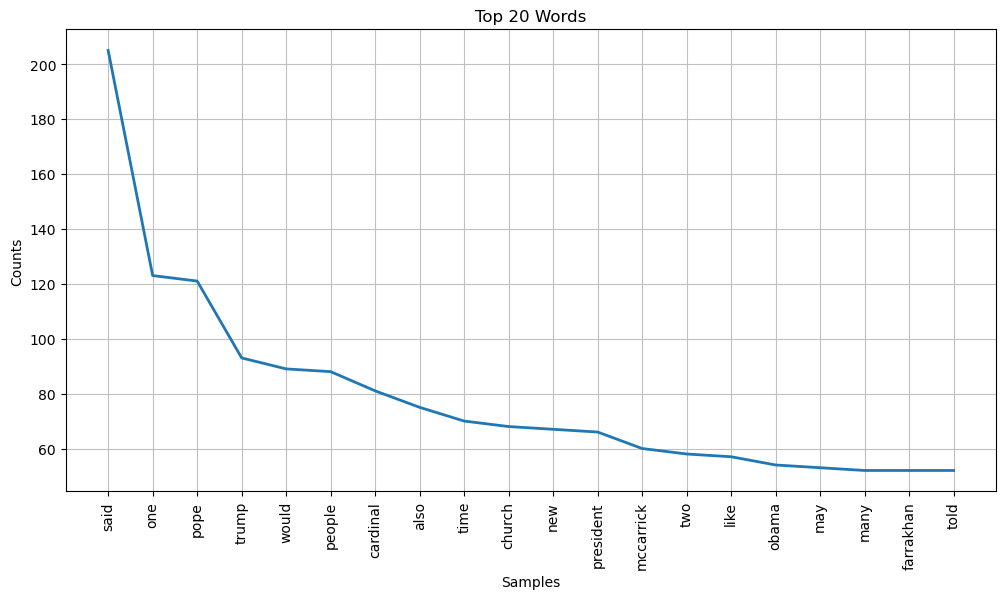

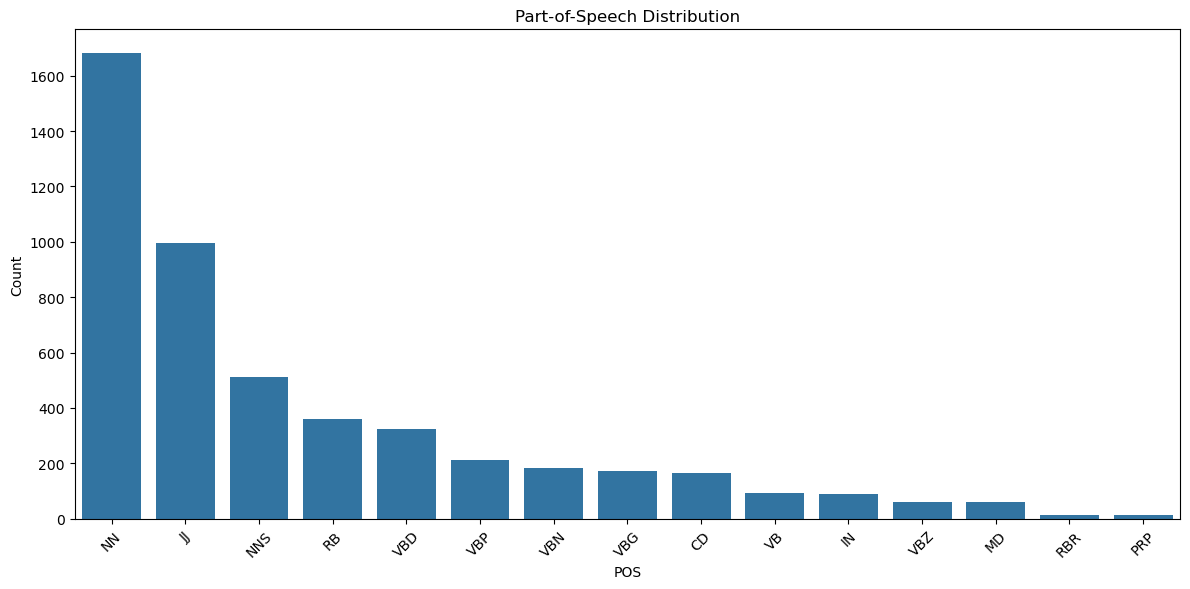


Top 15 bigrams:
[(('united', 'states'), 35), (('pope', 'francis'), 29), (('pope', 'benedict'), 26), (('donald', 'trump'), 18), (('sodom', 'gomorrah'), 18), (('sexual', 'harassment'), 17), (('president', 'trump'), 15), (('muhammad', 'said'), 15), (('nation', 'islam'), 14), (('cardinal', 'mccarrick'), 13), (('supreme', 'court'), 13), (('las', 'vegas'), 13), (('nuclear', 'deal'), 12), (('hillary', 'clinton'), 12), (('david', 'duke'), 11)]


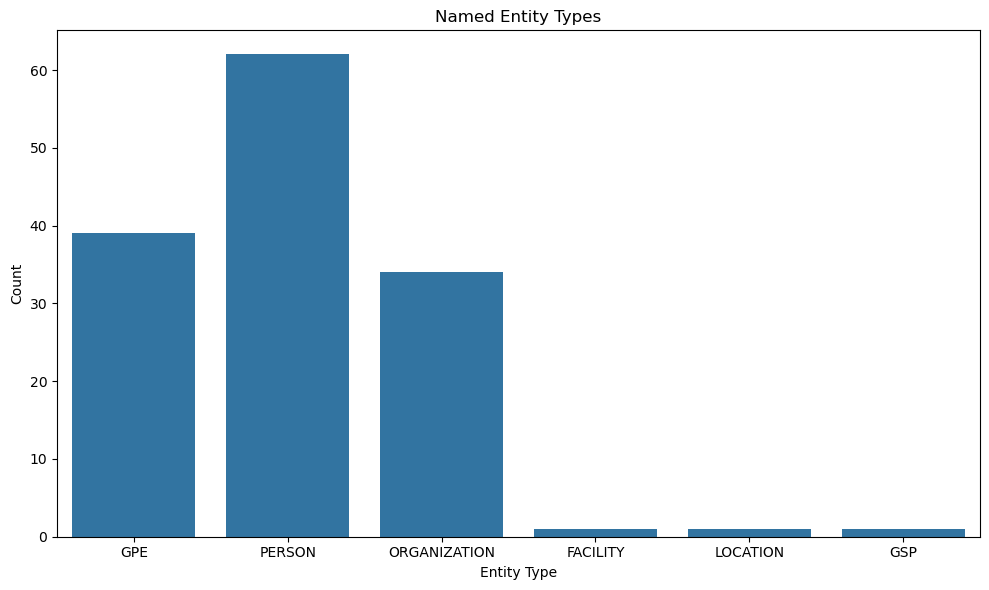

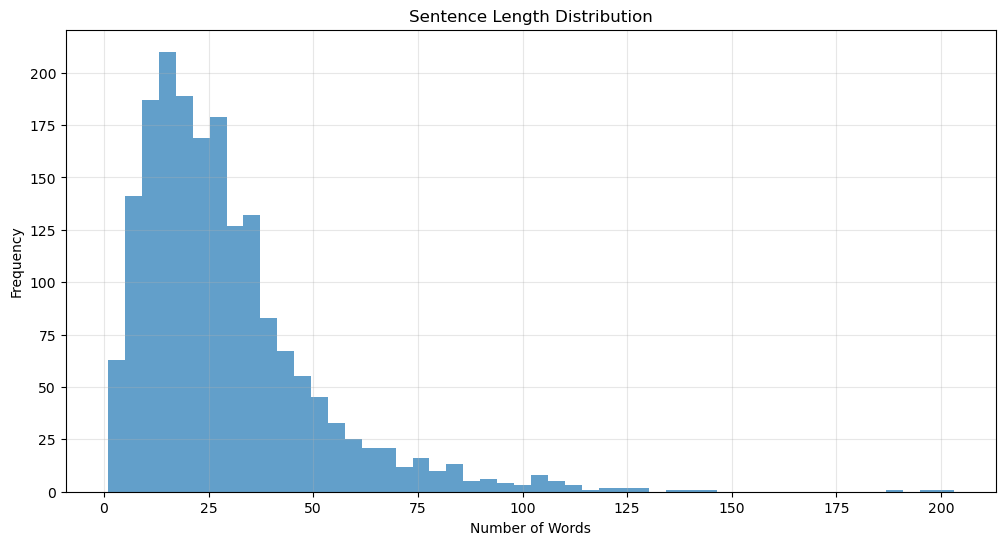


Sentence Length Stats:
Min length: 1 words
Max length: 203 words
Mean length: 29.43 words
Median length: 25.00 words


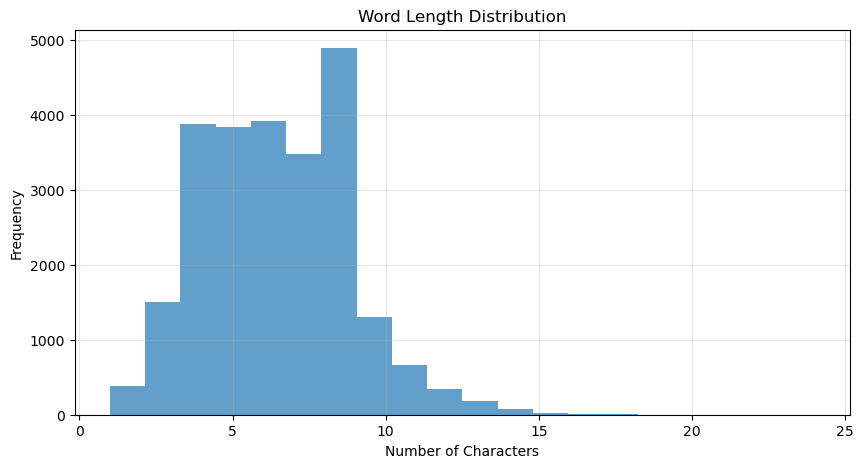


Sample sentences:
1.  South Florida Muslim Leader Sofian Zakkout’s David Duke Day

David Duke, the white supremacist icon and former Grand Wizard of the Ku Klux Klan, has been denounced by many as a hatemonger, and rightfully so.
2. However, one individual who represents the Muslim community of South Florida, Sofian Zakkout, is enamored with Duke and has been promoting Duke’s bigoted work for many years.
3. Last month, once again, Zakkout chose to showcase this work by posting four consecutive Duke videos on his (Zakkout’s) personal Facebook page.
4. The postings can be rivaled only by Zakkout’s own documented bigotry.
5. Sofian Abdelaziz Zakkout is the President of the American Muslim Association of North America (AMANA).


In [36]:
import os
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import numpy as np
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.util import ngrams
from nltk import pos_tag, ne_chunk
import seaborn as sns

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Create a function to read and process text files
def read_text_files(file_paths, max_files=100):
    all_text = ""
    file_count = 0
    
    # Limit the number of files to process
    for file_path in file_paths[:max_files]:
        try:
            with open(file_path, 'r', encoding='utf-8') as file:
                all_text += " " + file.read()
                file_count += 1
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
    
    print(f"Successfully read {file_count} files")
    return all_text

# Read the text files
raw_text = read_text_files(text_files, max_files=50)

# Basic text statistics
print("\nText Statistics:")
print(f"Total characters: {len(raw_text)}")

# Tokenize into sentences and words
sentences = sent_tokenize(raw_text)
words = word_tokenize(raw_text.lower())

print(f"Total sentences: {len(sentences)}")
print(f"Total words: {len(words)}")
print(f"Average sentence length: {len(words)/len(sentences):.2f} words")

# Remove stopwords and punctuation
english_stopwords = set(stopwords.words('english'))
words_no_stop = [word for word in words if word.isalnum() and word not in english_stopwords]
print(f"Words without stopwords: {len(words_no_stop)}")

# Vocabulary richness
unique_words = set(words_no_stop)
print(f"Unique words: {len(unique_words)}")
print(f"Lexical diversity: {len(unique_words)/len(words_no_stop):.4f}")

# Word frequency analysis
word_freq = FreqDist(words_no_stop)
print("\nTop 20 most common words:")
print(word_freq.most_common(20))

# Plot word frequency
plt.figure(figsize=(12, 6))
word_freq.plot(20, title="Top 20 Words")
plt.show()

# Part-of-speech tagging
pos_tags = pos_tag(words_no_stop[:5000])  # Limit to first 5000 words for efficiency
pos_counts = Counter(tag for word, tag in pos_tags)

# Plot POS distribution
plt.figure(figsize=(12, 6))
pos_df = pd.DataFrame(pos_counts.items(), columns=['POS', 'Count'])
pos_df = pos_df.sort_values('Count', ascending=False).head(15)
sns.barplot(x='POS', y='Count', data=pos_df)
plt.title('Part-of-Speech Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# N-grams analysis
bigrams = list(ngrams(words_no_stop, 2))
bigram_freq = Counter(bigrams)
print("\nTop 15 bigrams:")
print(bigram_freq.most_common(15))

# Named Entity Recognition (on a subset for efficiency)
sample_text = " ".join(sentences[:50])
sample_words = word_tokenize(sample_text)
sample_pos = pos_tag(sample_words)
named_entities = ne_chunk(sample_pos)

# Count entity types
entity_types = Counter()
for chunk in named_entities:
    if hasattr(chunk, 'label'):
        entity_types[chunk.label()] += 1

# Plot entity types
if entity_types:
    plt.figure(figsize=(10, 6))
    entity_df = pd.DataFrame(entity_types.items(), columns=['Entity Type', 'Count'])
    sns.barplot(x='Entity Type', y='Count', data=entity_df)
    plt.title('Named Entity Types')
    plt.tight_layout()
    plt.show()

# Sentence length distribution
sent_lengths = [len(word_tokenize(sent)) for sent in sentences]
plt.figure(figsize=(12, 6))
plt.hist(sent_lengths, bins=50, alpha=0.7)
plt.title('Sentence Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

print("\nSentence Length Stats:")
print(f"Min length: {min(sent_lengths)} words")
print(f"Max length: {max(sent_lengths)} words")
print(f"Mean length: {np.mean(sent_lengths):.2f} words")
print(f"Median length: {np.median(sent_lengths):.2f} words")

# Word length distribution
word_lengths = [len(word) for word in words_no_stop]
plt.figure(figsize=(10, 5))
plt.hist(word_lengths, bins=20, alpha=0.7)
plt.title('Word Length Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# Sample of sentences
print("\nSample sentences:")
for i, sent in enumerate(sentences[:5]):
    print(f"{i+1}. {sent}")

In [37]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
import re

# Set up the plotting style
plt.style.use('ggplot')
sns.set(font_scale=1.2)

# Define the 14 propaganda techniques from SemEval Task 11
PROPAGANDA_TECHNIQUES = [
    'Appeal_to_Authority', 'Appeal_to_fear-prejudice', 'Bandwagon,Reductio_ad_hitlerum',
    'Black-and-White_Fallacy', 'Causal_Oversimplification', 'Doubt', 
    'Exaggeration,Minimisation', 'Flag-Waving', 'Loaded_Language',
    'Name_Calling,Labeling', 'Repetition', 'Slogans', 'Thought-terminating_Cliches',
    'Whataboutism,Straw_Men,Red_Herring'
]

def find_label_files(directory):
    """Find all files that might contain propaganda technique labels"""
    label_files = []
    
    # Walk through directory structure
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Look for files that might contain labels
            if 'labels' in file.lower() or 'technique' in file.lower() or file.endswith('.labels'):
                label_files.append(os.path.join(root, file))
    
    return label_files

def parse_technique_labels(file_path):
    """Parse a file containing propaganda technique labels"""
    techniques = []
    article_ids = set()
    
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            for line in f:
                # Try to extract technique information
                parts = line.strip().split('\t')
                if len(parts) >= 3:  # Most label files have article_id, technique, spans
                    article_ids.add(parts[0])
                    techniques.append(parts[1])
    except Exception as e:
        print(f"Error parsing {file_path}: {e}")
    
    return techniques, article_ids

def analyze_propaganda_techniques():
    # Find potential label files
    label_files = find_label_files('.')
    
    if not label_files:
        print("No label files found. Please check the directory structure.")
        return
    
    print(f"Found {len(label_files)} potential label files:")
    for file in label_files:
        print(f" - {file}")
    
    # Analyze each label file
    all_techniques = []
    all_article_ids = set()
    
    for file in label_files:
        techniques, article_ids = parse_technique_labels(file)
        all_techniques.extend(techniques)
        all_article_ids.update(article_ids)
        
        if techniques:
            print(f"\nFile: {file}")
            print(f" - Contains {len(techniques)} technique annotations")
            print(f" - References {len(article_ids)} unique articles")
            
            # Count technique frequencies for this file
            technique_counts = Counter(techniques)
            print(f" - Top 5 techniques in this file: {technique_counts.most_common(5)}")
    
    # Overall statistics
    print("\n=== OVERALL STATISTICS ===")
    print(f"Total technique annotations: {len(all_techniques)}")
    print(f"Total unique articles: {len(all_article_ids)}")
    
    if all_techniques:
        technique_counter = Counter(all_techniques)
        
        # Create DataFrame for visualization
        df = pd.DataFrame({
            'Technique': list(technique_counter.keys()),
            'Count': list(technique_counter.values())
        }).sort_values('Count', ascending=False)
        
        # Print table of technique counts
        print("\nPropaganda Technique Distribution:")
        print(df.to_string(index=False))
        
        # Visualize technique distribution
        plt.figure(figsize=(14, 8))
        sns.barplot(x='Count', y='Technique', data=df)
        plt.title('Distribution of Propaganda Techniques')
        plt.xlabel('Frequency')
        plt.tight_layout()
        plt.show()
        
        # Calculate percentage distribution
        total = sum(technique_counter.values())
        df['Percentage'] = df['Count'] / total * 100
        
        # Pie chart of technique distribution
        plt.figure(figsize=(12, 12))
        plt.pie(df['Count'][:7], labels=df['Technique'][:7], autopct='%1.1f%%')
        plt.title('Top 7 Propaganda Techniques by Frequency')
        plt.axis('equal')
        plt.show()
        
        # Check technique co-occurrence (if we can identify articles)
        if len(all_article_ids) > 1:
            print("\nAnalyzing potential co-occurrence of techniques...")
            # We would need more parsing to properly analyze this
            
    # Sample analysis to verify against expected techniques
    known_techniques = set(PROPAGANDA_TECHNIQUES)
    found_techniques = set(all_techniques)
    
    print("\n=== TECHNIQUE VERIFICATION ===")
    print(f"Expected propaganda techniques: {len(known_techniques)}")

In [39]:
# Add this code to explore relationships between articles, techniques and text

def analyze_technique_context(directory):
    """Analyze the context in which propaganda techniques appear"""
    label_files = find_label_files(directory)
    article_files = []
    
    # Find article text files
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.txt') and 'article' in file.lower():
                article_files.append(os.path.join(root, file))
    
    print(f"Found {len(article_files)} article files")
    
    # Find a matching label file and article file pair
    for label_file in label_files:
        # Extract potential article id from filename
        label_name = os.path.basename(label_file)
        article_id_match = re.search(r'article(\d+)', label_name)
        
        if article_id_match:
            article_id = article_id_match.group(1)
            # Look for matching article file
            matching_articles = [f for f in article_files if article_id in f]
            
            if matching_articles:
                # We found a matching pair!
                article_file = matching_articles[0]
                print(f"\nAnalyzing propaganda in article {article_id}:")
                
                # Read article text
                try:
                    with open(article_file, 'r', encoding='utf-8') as f:
                        article_text = f.read()
                    
                    print(f"Article length: {len(article_text)} characters")
                    
                    # Read technique labels
                    techniques = []
                    spans = []
                    with open(label_file, 'r', encoding='utf-8') as f:
                        for line in f:
                            parts = line.strip().split('\t')
                            if len(parts) >= 4:  # article_id, technique, start, end
                                techniques.append(parts[1])
                                spans.append((int(parts[2]), int(parts[3])))
                    
                    # Show technique distribution in this article
                    technique_counts = Counter(techniques)
                    print(f"Techniques used in this article: {dict(technique_counts)}")
                    
                    # Show a few examples of propaganda spans
                    print("\nExamples of propaganda techniques in context:")
                    for i, (technique, (start, end)) in enumerate(zip(techniques, spans)):
                        if i >= 5:  # Limit to 5 examples
                            break
                            
                        # Get context (20 chars before and after)
                        context_start = max(0, start - 20)
                        context_end = min(len(article_text), end + 20)
                        
                        # Format the output to highlight the propaganda span
                        context = article_text[context_start:start]
                        span_text = article_text[start:end]
                        after_context = article_text[end:context_end]
                        
                        print(f"\nTechnique: {technique}")
                        print(f"...{context}[{span_text}]{after_context}...")
                    
                    # Break after analyzing one example article
                    break
                        
                except Exception as e:
                    print(f"Error analyzing article: {e}")
                
                # We only need one good example
                break

# Run additional analysis
analyze_technique_context('.')

Found 892 article files

Analyzing propaganda in article 758756657:
Article length: 6919 characters
Techniques used in this article: {'Repetition': 7, 'Loaded_Language': 7, 'Causal_Oversimplification': 1, 'Exaggeration,Minimisation': 1, 'Appeal_to_fear-prejudice': 4, 'Slogans': 1, 'Flag-Waving': 2, 'Doubt': 3}

Examples of propaganda techniques in context:

Technique: Repetition
...seen the increasing [Islamization] of the public-schoo...

Technique: Repetition
...pment in the forced [Islamization] of his children’s s...

Technique: Loaded_Language
...irginia

This is an [outrage], but it is common n...

Technique: Causal_Oversimplification
...the Public Schools.”[In order to convert to Islam, one says the shahada.
Saying the shahada makes you a Muslim.
The shahada is what is on the black flag of jihad].
No non-Muslim stud...

Technique: Loaded_Language
...rst to protest this [egregious] submission to the m...


# GLiNER testing

In [1]:
from gliner import GLiNER

model = GLiNER.from_pretrained("knowledgator/modern-gliner-bi-large-v1.0")

text = """
Cristiano Ronaldo dos Santos Aveiro (Portuguese pronunciation: [kɾiʃˈtjɐnu ʁɔˈnaldu]; born 5 February 1985) is a Portuguese professional footballer who plays as a forward for and captains both Saudi Pro League club Al Nassr and the Portugal national team. Widely regarded as one of the greatest players of all time, Ronaldo has won five Ballon d'Or awards,[note 3] a record three UEFA Men's Player of the Year Awards, and four European Golden Shoes, the most by a European player. He has won 33 trophies in his career, including seven league titles, five UEFA Champions Leagues, the UEFA European Championship and the UEFA Nations League. Ronaldo holds the records for most appearances (183), goals (140) and assists (42) in the Champions League, goals in the European Championship (14), international goals (128) and international appearances (205). He is one of the few players to have made over 1,200 professional career appearances, the most by an outfield player, and has scored over 850 official senior career goals for club and country, making him the top goalscorer of all time.
"""

labels = ["person", "award", "date", "competitions", "teams"]

entities = model.predict_entities(text, labels, threshold=0.3)

for entity in entities:
    print(entity["text"], "=>", entity["label"])


/Users/home/miniconda3/envs/266/lib/python3.10/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(
/Users/home/miniconda3/envs/266/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Fetching 9 files: 100%|██████████| 9/9 [00:00<00:00, 98048.66it/s]
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Cristiano Ronaldo dos Santos Aveiro => person
5 February 1985 => date
Ballon d'Or => award
UEFA Men's Player of the Year Awards => award
European Golden Shoes => award
UEFA Nations League => competitions


In [27]:
# !pip install flash-attn 

In [28]:
# !pip install flash-attn triton -y

In [29]:
model = GLiNER.from_pretrained("knowledgator/modern-gliner-bi-large-v1.0",
                                _attn_implementation = 'flash_attention_2',
                                                max_len = 2048).to('cuda:0')

Fetching 9 files: 100%|██████████| 9/9 [00:00<00:00, 187804.66it/s]


ImportError: FlashAttention2 has been toggled on, but it cannot be used due to the following error: the package flash_attn seems to be not installed. Please refer to the documentation of https://huggingface.co/docs/transformers/perf_infer_gpu_one#flashattention-2 to install Flash Attention 2.